In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import display
from sklearn.metrics.pairwise import pairwise_distances


Data Pre-processing

In [ ]:
data = pd.read_csv('acceleration_data_in_bilbao_SP.csv')

data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')
data.fillna(method='ffill', inplace=True)

data['acc_magnitude'] = np.sqrt(data['acc_x']**2 + data['acc_y']**2 + data['acc_z']**2)

data['acc_z_smooth'] = data['acc_z'].rolling(window=10, center=True).mean()
data['acc_magnitude_smooth'] = data['acc_magnitude'].rolling(window=10, center=True).mean()


data['speed_diff'] = data['speed'].diff().fillna(0)


Feature Engineering

In [17]:

features = data[['acc_z_smooth', 'acc_magnitude_smooth', 'speed_diff']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.fillna(features.mean()))


Clustering using K-Means

In [18]:

kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters (potholes, speed bumps, normal driving)
data['cluster'] = kmeans.fit_predict(scaled_features)

cluster_to_class = {
    0: 'probably normal',
    1: 'probably pothole',
    2: 'probably speed bump'
}

data['class'] = data['cluster'].map(cluster_to_class)



Visualisation

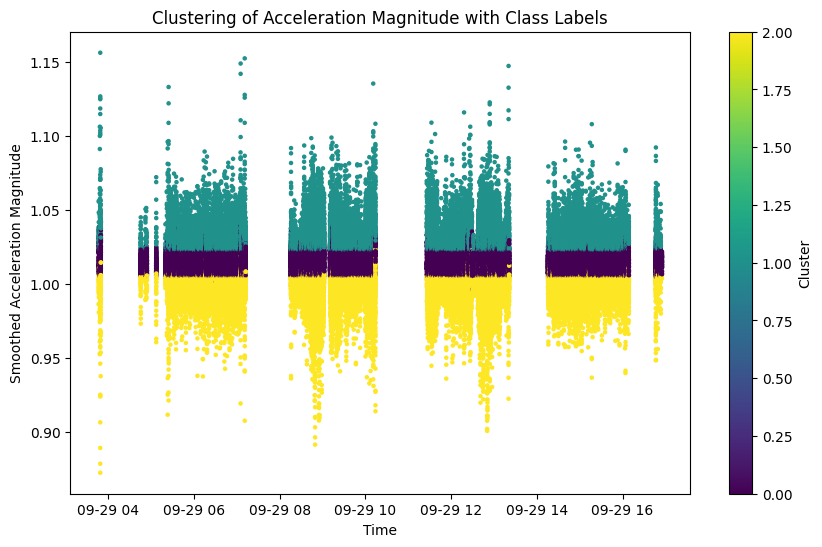


Sample of labeled data:



,time,latitude,longitude,acc_z_smooth,class
70434,2022-09-29 15:41:57.638,43.017735,-2.908594,1.0006,probably speed bump
244400,2022-09-29 15:21:38.511,42.791140,-2.899372,1.0121,probably normal
10693,2022-09-29 05:55:17.228,42.958866,-2.870569,1.0143,probably normal
17901,2022-09-29 08:43:44.830,42.598470,-3.791238,1.0010,probably speed bump
114338,2022-09-29 08:31:23.668,42.483910,-3.694682,1.0205,probably normal


In [19]:

plt.figure(figsize=(10, 6))
plt.scatter(data['time'], data['acc_magnitude_smooth'], c=data['cluster'], cmap='viridis', s=5)
plt.title('Clustering of Acceleration Magnitude with Class Labels')
plt.xlabel('Time')
plt.ylabel('Smoothed Acceleration Magnitude')
plt.colorbar(label='Cluster')
plt.show()

data.to_csv('labeled_accelerometer_data.csv', index=False)

print("\n\033[4mSample of labeled data:\033[0m\n")
display(data[['time', 'latitude', 'longitude', 'acc_z_smooth', 'class']].sample(n=5))


Evaluation

In [20]:
centroids = kmeans.cluster_centers_

distances = pairwise_distances(centroids)

print(f"\n\033[4mDistances between cluster centroids:\033[0m\n")
print(distances)

print(f"\n\033[4mClass distribution:\033[0m\n")
display(data['class'].value_counts().to_frame())



Distances between cluster centroids:

[[0.         1.94890288 1.78677143]
 [1.94890288 0.         3.73545437]
 [1.78677143 3.73545437 0.        ]]

Class distribution:



,count
class,
probably normal,155074
probably speed bump,55734
probably pothole,51635
